



# Spam SMS Classification


In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv('Spam SMS Collection', sep='\t', names=['label', 'message'])

In [3]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# **Exploratory Data Analysis (EDA)**
* Exploring NaN values in dataset
* Plotting countplots for Spam vs. Ham



In [4]:
df.shape

(5572, 2)

In [5]:
df.columns

Index(['label', 'message'], dtype='object')

In [6]:
df.dtypes

label      object
message    object
dtype: object

In [7]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.describe(include='object')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
# Mapping values for label
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [12]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.tail()

,label,message
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [14]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

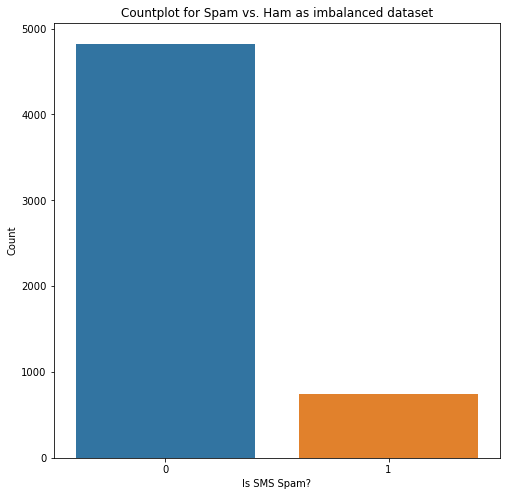

In [15]:
# Countplot for Spam vs. Ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Ham vs. Spam as imbalanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

_**Insight:** From the above countplot, it is evident that the **dataset is imbalanced**._

# **Feature Engineering**
*   Handling imbalanced dataset using Oversampling
*   Creating new features e.g. word_count, contains_currency_symbol, contains_numbers, etc.



In [16]:
# Handling imbalanced dataset using Oversampling
only_spam = df[df['label']==1]
print('Number of Spam records: {}'.format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(df.shape[0]-only_spam.shape[0]))

Number of Spam records: 747
Number of Ham records: 4825


In [17]:
count = int((df.shape[0]-only_spam.shape[0])/only_spam.shape[0])
for i in range(0, count-1):
    df = pd.concat([df, only_spam])
df.shape

(9307, 2)

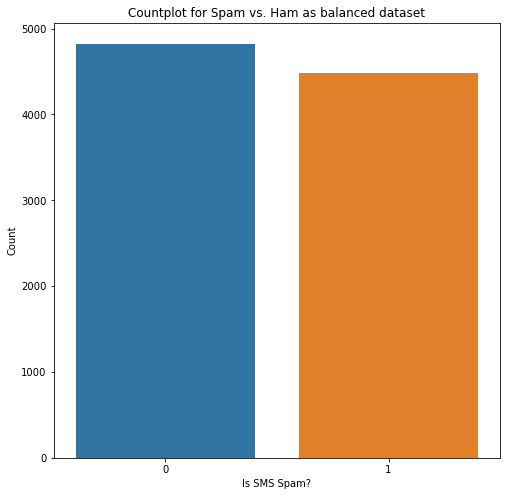

In [18]:
# Countplot for Spam vs. Ham as balanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as balanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

In [19]:
# Creating new feature word_count
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

In [20]:
df.head()

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


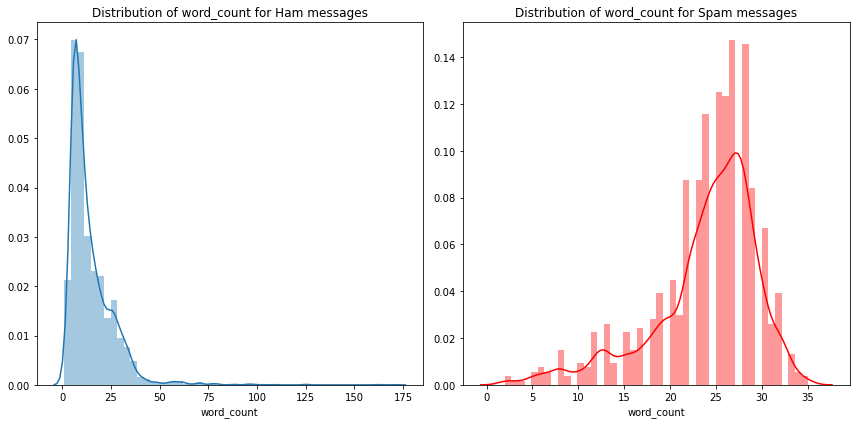

In [21]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=df[df['label']==0].word_count)
p = plt.title('Distribution of word_count for Ham messages')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['label']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam messages')

plt.tight_layout()
plt.show()

In [22]:
# Creating feature contains_currency_symbol
def currency(x):
    currency_symbols = ['€', '$', '¥', '£', '₹']
    for i in currency_symbols:
        if i in x:
            return 1
        return 0

df['contains_currency_symbol'] = df['message'].apply(currency)

In [23]:
df.tail()

,label,message,word_count,contains_currency_symbol
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,0
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0
5567,1,This is the 2nd time we have tried 2 contact u...,30,0


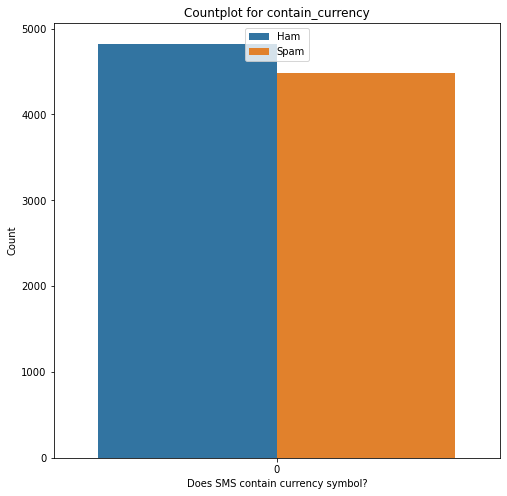

In [24]:
# Countplot for contains_currency_symbol
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbol', data=df, hue='label')
p = plt.title('Countplot for contain_currency')
p = plt.xlabel('Does SMS contain currency symbol?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

In [25]:
# Creating feature contains_number
def numbers(x):
    for i in x:
        if ord(i)>=48 and ord(i)<=57:
            return 1
        return 0

df['contains_number'] = df['message'].apply(numbers)

In [26]:
df.head()

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,0
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


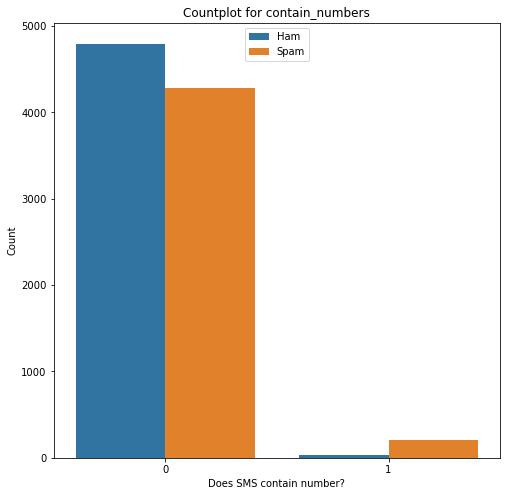

In [27]:
# Countplot for contains_number
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_number', data=df, hue='label')
p = plt.title('Countplot for contain_numbers')
p = plt.xlabel('Does SMS contain number?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

# **Data Cleaning**
* Removing special character and numbers using regular expression
* Converting the entire sms into lower case
* Tokenizing the sms by words
* Removing the stop words
* Lemmatizing the words
* Joining the lemmatized words
* Building a corpus of messages

In [28]:
# Importing essential libraries for performing NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [29]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.message):

  # Cleaning special character from the sms
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  message = message.lower()

  # Tokenizing the sms by words
  words = message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(message)

In [30]:
corpus[0:3]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']

In [31]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']

# **Model Building & Evaluation**
_**Metric: Accuracy**_

* Naive Bayes: 94.1%
* Decision Tree: 98.2%
* **Random Forest (Ensemble): 99.3%**


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Naive Bayes

In [34]:
# Classification report for Naive bayes model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print('--- Classification report for MNB model ---')
print(classification_report(y_test, y_pred_nb))

--- Classification report for MNB model ---
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       959
           1       0.96      0.91      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



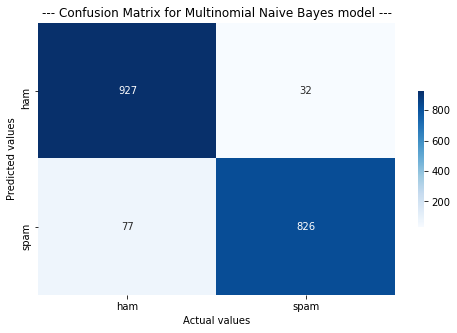

In [35]:
# Confusion matrix of MNB model
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8,5))
axis_labels_nb = ['ham', 'spam']
g_nb = sns.heatmap(data=cm_nb, annot=True, cmap="Blues", xticklabels=axis_labels_nb, yticklabels=axis_labels_nb, fmt='g', cbar_kws={"shrink": 0.5})
p_nb = plt.xlabel('Actual values')
p_nb = plt.ylabel('Predicted values')
p_nb = plt.title('--- Confusion Matrix for Multinomial Naive Bayes model ---')

In [36]:
from sklearn.metrics import (accuracy_score,f1_score)

accuray_nb = accuracy_score(y_pred_nb, y_test)
f1_nb = f1_score(y_pred_nb, y_test, average="weighted")

print("Accuracy:", accuray_nb)
print("F1 Score:", f1_nb)

Accuracy: 0.9414607948442535
F1 Score: 0.9415377612229503


## Decision Tree

In [37]:
# Classification report for Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print('--- Classification report for Decision Tree model ---')
print(classification_report(y_test, y_pred_dt))

--- Classification report for Decision Tree model ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       959
           1       0.97      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



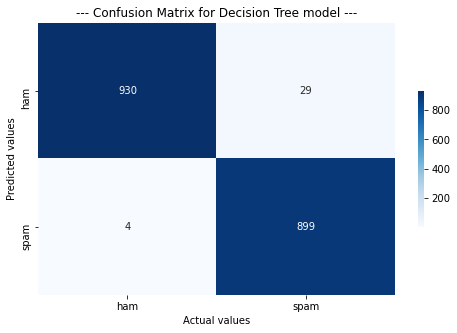

In [38]:
# Confusion matrix of Decision Tree model
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8,5))
axis_labels_dt = ['ham', 'spam']
g_dt = sns.heatmap(data=cm_dt, annot=True, cmap="Blues", xticklabels=axis_labels_dt, yticklabels=axis_labels_dt, fmt='g', cbar_kws={"shrink": 0.5})
p_dt = plt.xlabel('Actual values')
p_dt = plt.ylabel('Predicted values')
p_dt = plt.title('--- Confusion Matrix for Decision Tree model ---')

In [39]:
from sklearn.metrics import (accuracy_score,f1_score)

accuray_dt = accuracy_score(y_pred_dt, y_test)
f1_dt = f1_score(y_pred_dt, y_test, average="weighted")

print("Accuracy:", accuray_dt)
print("F1 Score:", f1_dt)

Accuracy: 0.9822771213748658
F1 Score: 0.9822731586218287


## Random Forest

In [40]:
# Classification report for Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('--- Classification report for Random Forest model ---')
print(classification_report(y_test, y_pred_rf))

--- Classification report for Random Forest model ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       959
           1       0.99      1.00      0.99       903

    accuracy                           0.99      1862
   macro avg       0.99      0.99      0.99      1862
weighted avg       0.99      0.99      0.99      1862



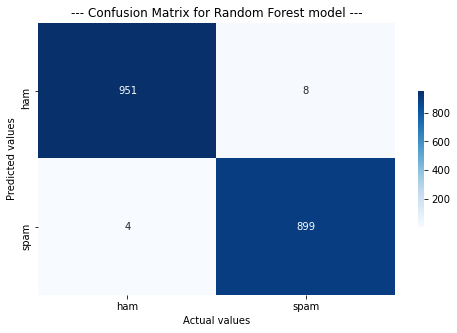

In [41]:
# Confusion matrix of Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,5))
axis_labels_rf = ['ham', 'spam']
g_rf = sns.heatmap(data=cm_rf, annot=True, cmap="Blues", xticklabels=axis_labels_rf, yticklabels=axis_labels_rf, fmt='g', cbar_kws={"shrink": 0.5})
p_rf = plt.xlabel('Actual values')
p_rf = plt.ylabel('Predicted values')
p_rf = plt.title('--- Confusion Matrix for Random Forest model ---')

In [42]:
from sklearn.metrics import (accuracy_score,f1_score)

accuray_rf = accuracy_score(y_pred_rf, y_test)
f1_rf = f1_score(y_pred_rf, y_test, average="weighted")

print("Accuracy:", accuray_rf)
print("F1 Score:", f1_rf)

Accuracy: 0.9935553168635876
F1 Score: 0.9935549299229026


# **Making Predictions**

In [43]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    final_message = [wnl.lemmatize(word) for word in sample_message_words]
    final_message = ' '.join(final_message)

    temp = tfidf.transform([final_message]).toarray()
    return rf.predict(temp)

In [44]:
# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


In [45]:
# Prediction 2 - Casual text chat
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')

This is a HAM (normal) message.


In [46]:
# Prediction 3 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')

This is a HAM (normal) message.


In [47]:
# Predicting values 4 - Feedback message
sample_message = 'Tammy, thanks for choosing Carl’s Car Wash for your express polish. We would love to hear your thoughts on the service. Feel free to text back with any feedback. Safe driving!'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.
